In [4]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# 데이터 경로
image_path = r'C:\Users\amk25\D\clipped_(3)'
# 레이블 정의
labels = []

# 이미지 데이터 로드 및 전처리
def load_images_and_labels(image_path, target_size=(300, 400)):
    image_data = []
    labels = []
    
    image_files = os.listdir(image_path)
    
    for image_file in image_files:
        if 'fail' in image_file:
            label = 1
        else:
            label = 0
        labels.append(label)
            
        image = cv2.imread(os.path.join(image_path, image_file), cv2.IMREAD_GRAYSCALE)
        if image is not None:
            resized_image = cv2.resize(image, target_size)
            image_data.append(resized_image)

    return np.array(image_data), np.array(labels)

images, labels = load_images_and_labels(image_path)

In [5]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 사용하여 문자열 레이블을 정수로 매핑
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)

# 이미지 정규화
images_normalized = images / 255.0

# 정수 레이블을 원-핫 인코딩
labels_one_hot = to_categorical(integer_labels)

print("Original labels:", labels)
print("Integer labels:", integer_labels)
print("One-hot encoded labels:\n", labels_one_hot)

Original labels: [1 1 1 ... 0 0 0]
Integer labels: [1 1 1 ... 0 0 0]
One-hot encoded labels:
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [6]:
print("images_normalized shape:", images_normalized.shape)
print("labels_one_hot shape:", labels_one_hot.shape)

images_normalized shape: (1450, 400, 300)
labels_one_hot shape: (1450, 2)


In [ ]:
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(
    images_normalized, labels_one_hot, test_size=0.2, random_state=42)

# 이미지 데이터 형태 조정
X_train = X_train.reshape((-1, 400, 300, 1))
X_test = X_test.reshape((-1, 400, 300, 1))


# 모델 구성
# CNN 모델 구축
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(400, 300, 1)),
    layers.MaxPooling2D((2, 2)),
    # 추가적인 층 추가 가능
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='sigmoid')  # 클래스 수에 맞게 조정
])

# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# 성능 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
37/37 [==============================] - 30s 774ms/step - loss: 4.6640 - accuracy: 0.7362 - val_loss: 0.6401 - val_accuracy: 1.0000
Epoch 2/10
37/37 [==============================] - 28s 762ms/step - loss: 0.6324 - accuracy: 0.9888 - val_loss: 0.6249 - val_accuracy: 1.0000
Epoch 3/10
37/37 [==============================] - 29s 793ms/step - loss: 0.6234 - accuracy: 0.9991 - val_loss: 0.6190 - val_accuracy: 1.0000
Epoch 4/10
37/37 [==============================] - 28s 769ms/step - loss: 0.6156 - accuracy: 1.0000 - val_loss: 0.6110 - val_accuracy: 1.0000
Epoch 5/10
37/37 [==============================] - 28s 761ms/step - loss: 0.6068 - accuracy: 1.0000 - val_loss: 0.6000 - val_accuracy: 1.0000
Epoch 6/10
37/37 [==============================] - 28s 755ms/step - loss: 0.5954 - accuracy: 1.0000 - val_loss: 0.5869 - val_accuracy: 1.0000
Epoch 7/10
37/37 [==============================] - 28s 763ms/step - loss: 0.5813 - accuracy: 1.0000 - val_loss: 0.5715 - val_accuracy: 1.0000

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 313632)            0         
                                                                 
 dense (Dense)               (None, 64)                20072512  
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 20072962 (76.57 MB)
Trainable params: 20072962 (76.57 MB)
Non-trainable params: 0 (0.00 Byte)
______________

Epoch 1/10
55/55 [==============================] - 61s 1s/step - loss: 0.1336 - accuracy: 0.9862 - val_loss: 0.0019 - val_accuracy: 0.9977
Epoch 2/10
55/55 [==============================] - 57s 1s/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/10
55/55 [==============================] - 57s 1s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/10
55/55 [==============================] - 56s 1s/step - loss: 0.0079 - accuracy: 0.9983 - val_loss: 9.1924e-04 - val_accuracy: 1.0000
Epoch 5/10
55/55 [==============================] - 54s 987ms/step - loss: 0.0030 - accuracy: 0.9988 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 6/10
55/55 [==============================] - 56s 1s/step - loss: 0.0044 - accuracy: 0.9983 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/10
55/55 [==============================] - 56s 1s/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 6.5004e-04 - val_accuracy: 1.0000
Epoch 8/1

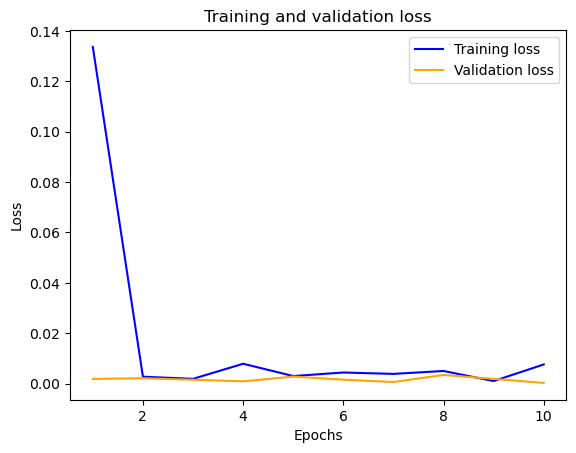

In [5]:
import matplotlib.pyplot as plt

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 history 객체 얻기
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 이전에 훈련한 모델의 history 객체에서 loss 및 val_loss를 가져옵니다.
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'orange', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
14/14 [==============================] - 11s 708ms/step - loss: 0.6890 - accuracy: 0.4909 - val_loss: 0.6948 - val_accuracy: 0.4636
Epoch 2/5
14/14 [==============================] - 10s 700ms/step - loss: 0.6930 - accuracy: 0.5091 - val_loss: 0.6948 - val_accuracy: 0.4636
Epoch 3/5
14/14 [==============================] - 10s 690ms/step - loss: 0.6930 - accuracy: 0.5091 - val_loss: 0.6948 - val_accuracy: 0.4636
Epoch 4/5
14/14 [==============================] - 10s 688ms/step - loss: 0.6931 - accuracy: 0.5091 - val_loss: 0.6947 - val_accuracy: 0.4636
Epoch 5/5
14/14 [==============================] - 10s 684ms/step - loss: 0.6930 - accuracy: 0.5091 - val_loss: 0.6947 - val_accuracy: 0.4636


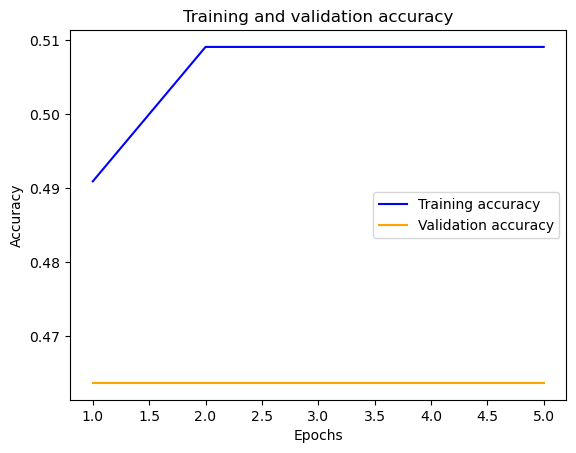

In [46]:
import matplotlib.pyplot as plt

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 history 객체 얻기
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# 이전에 훈련한 모델의 history 객체에서 accuracy 및 val_accuracy를 가져옵니다.
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(accuracy) + 1)

# Training and validation accuracy plot
plt.plot(epochs, accuracy, 'b', label='Training accuracy')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

13/13 [==============================] - 2s 174ms/step


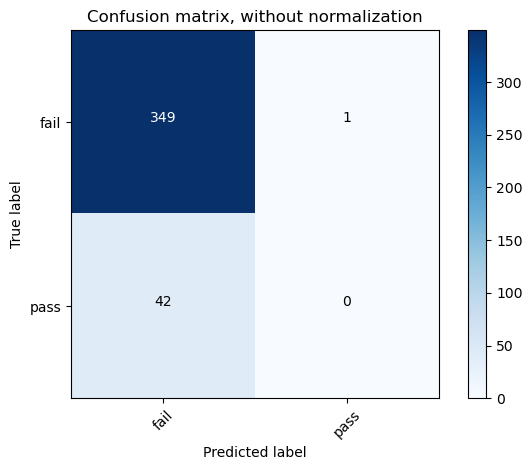

              precision    recall  f1-score   support

        fail       0.89      1.00      0.94       350
        pass       0.00      0.00      0.00        42

    accuracy                           0.89       392
   macro avg       0.45      0.50      0.47       392
weighted avg       0.80      0.89      0.84       392



In [18]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plot_confusion_matrix(conf_matrix, classes=['fail', 'pass'], title='Confusion matrix, without normalization')
plt.show()

# Classification Report
class_names = ['fail', 'pass']
print(classification_report(y_true, y_pred_classes, target_names=class_names))

1/1 [==============================] - 0s 100ms/step


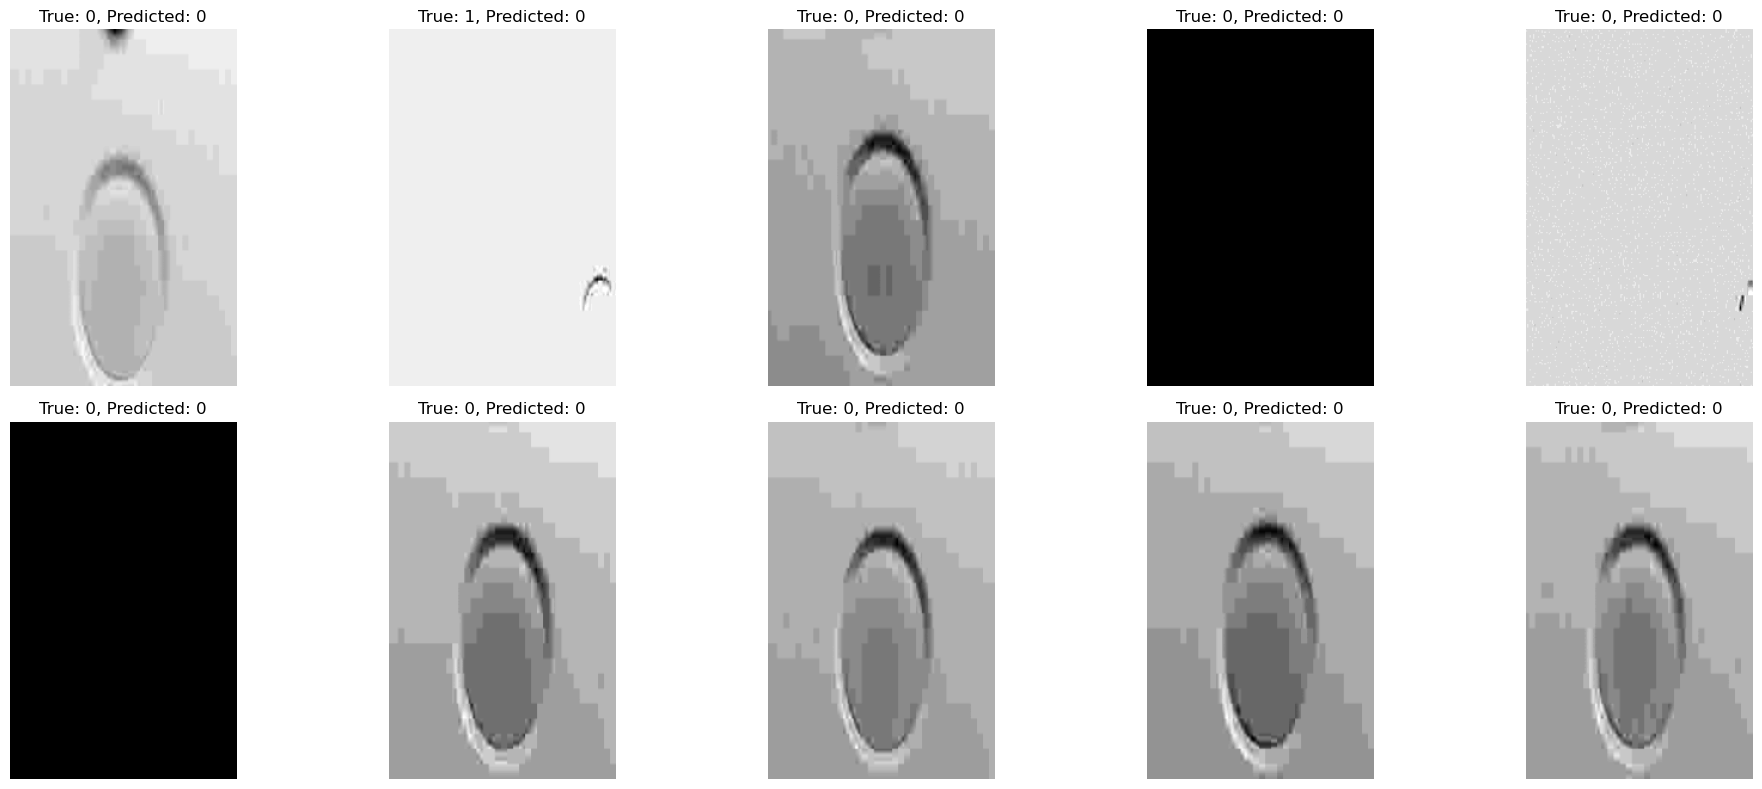

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 테스트 이미지 중 일부를 선택
num_images = 10  # 시각화할 이미지 수
sample_indices = np.random.choice(np.arange(len(X_test)), num_images, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

# 모델의 예측 수행
predictions = model.predict(sample_images)

# 시각화
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2행 5열의 그리드 생성
for i, ax in enumerate(axes.flatten()):
    # 이미지 데이터 형태 변경: 채널 정보를 제거하고 2차원으로 변환
    image = cv2.resize(sample_images[i], (190, 300))  # 이미지 크기를 모델이 기대하는 크기로 조정
    image = image * 255
    # 실제 레이블과 예측된 레이블 추출
    true_label = np.argmax(sample_labels[i])
    predicted_label = np.argmax(predictions[i])
    # 이미지와 레이블을 축에 표시
    ax.imshow(image, cmap='gray')
    ax.set_title(f'True: {true_label}, Predicted: {predicted_label}')
    ax.axis('off')  # 축 정보 제거
plt.tight_layout()
plt.show()